# Weibull Analysis

#### Created by Daniel Kim

<a name="sections"></a>

##Sections

- [Part 1 - Weibull analysis with complete failure data](#part1)
- [Part 2 - Weibull analysis with failure data and unfailed data (suspensions)](#part2)
- [Part 3 - Weibull analysis with Maximum Likelihood Estimation (MLE)](#MLE)

Weibull analysis is the process of modelling data that we suspect follows a Weibull distribution.  &nbsp;Most failures or "life data" follow the Weibull distribution due to its versatile nature and therefore it is probably the most used distribution to model such failures.  It has many applications, but I use it to forecast warranty part failures.<br><br>To determine if a set of data follows a Weibull distribution, the graphical method is the most popular method.  The graphical method entails graphing the failure times against a probability scale with a model that best fits the data using linear regression.  In Part 1 of a 3-part series, I will cover how to perform Weibull analysis when we have complete failure data.  That is, we waited for all of our units in the test or in the field to fail.  &nbsp;Part 2 in the series covers how to do Weibull analysis when we have data that also includes data for unfailed units or units that failed due to a different reason.  &nbsp;In Part 3, I will cover how to estimate the Weibull parameters using MLE method.  &nbsp;To be honest, I do not have a strong enough statistics and mathematics background to go into details and explain the theory on which method to use, although the general consensus is to use rank regression method if you have small-ish sample sizes (< 30).  If you have very large quantities of suspensions, MLE method seems to be the preferred method.<br><br>I created this IPython notebook as a benefit to me as I will very soon have to train fellow data analysts at my place of occupation. &nbsp;I think this notebook format helps me organize my thoughts as I am explaining things and it also allows for me to interact with the data and charts as I go along.  Therefore, I feel the IPython notebook format provides a pedagogic benefit to me and hopefully for others as well.  &nbsp;This Weibull analysis series assumes you have some statistics background.

<a name="part1"></a>
<br>
<br>

## Part 1 - Weibull analysis with complete failure data

[[back to top](#sections)]

#### The Weibull distribution is a statistical distribution (Normal distribution being the most known) that is commonly used to model life data or failure times of various types of failures.  The 2-parameter version of the Weibull distribution is the most widely-used version of the Weibull distribution.

<h3><strong>2-parameter Weibull Cumulative Distribution Function (CDF):</strong></h3><center>$\huge{F(x) = 1 - e^{(\frac{x}{\lambda})^k}}$,</center><br>
<center><p>where k is the shape parameter and $\lambda$ is the scale parameter.</p></center>

<center><h3>Let's say we were to model car battery failures and we found the failures follow a Weibull distribution.  &nbsp;It allows us to answer questions such as "What percent of the batteries will have failed after 200 days?"</h3></center>

<p>We will plot data points (failure times) and try to fit them onto a straight line in order to estimate our 2 Weibull parameters (k and $\lambda$).  Since the Weibull CDF is a logarithmic function, if we attempt to plot the data ploints on 1-1 scale x and y-axis, the data will not fall onto a straight line.  To address this, we need to apply linear transformation to the Weibull CDF equation by using laws of exponents and laws of logarithms:</p>

<center>$\large{F(x) = 1 - e^{(\frac{x}{\lambda})^k}}$</center><br><br>
<center>$1-F(x)=e^{-(\frac{x}{\lambda})^k}$</center><br><br>
<center>$ln(1-F(x))=-(\frac{x}{\lambda})^k$</center><br><br>
<center>$ln\left(\frac{1}{1-F(x)}\right)=(\frac{x}{\lambda})^k$</center><br><br>
<center>$ln\left(ln\left(\frac{1}{1-F(x)}\right)\right)=k{\space}ln(\frac{x}{\lambda})$</center><br><br>
<center>$\underbrace{ln\left(ln\left(\frac{1}{1-F(x)}\right)\right)}=\underbrace{k{\space}lnx}-\underbrace{k{\space}ln\lambda}$</center><br>
<center>$\space\space\space y\space\space\space\space\space\space\space\space\space\space=\space mx\space+\space\space b$</center><br>
<center>("linearized" Weibull CDF)</center><br><br>
With the Weibull CDF in its linear form, <strong>y</strong> is then equal to $ln\left(ln\left(\frac{1}{1-F(x)}\right)\right){\space}$,&nbsp;the slope <strong>m</strong> equals k,&nbsp;<strong>x</strong> equals ln(x), and the y-intercept <strong>b</strong> equals $-k{\space}ln\lambda\space\space$.<br><br>
Since<br><br>$b=-k{\space}ln\lambda{\space}{\space}$&nbsp;&nbsp;, then solving for $\lambda$ :<br><br>
$\large{\lambda=e^{-(\frac{b}{k})}}$<br><br>
<p>So now that we know how to estimate the 2 Weibull parameters ($\lambda$ and k), we are almost ready to create a Weibull probability plot later on.<br><br>A Weibull probability plot is simply plotting ln(x) versus $ln\left(ln\left(\frac{1}{1-F(x)}\right)\right)$<br><br>
But what is F(x)?  F(x) is based on calcuations for the "Median Ranks".  There are different ways to calculate median ranks.  But for Weibull distribution, it is suggested to use Bernard's formula for median ranks:</p><br>
<center>$\huge{\frac{(rank - 0.3)}{(n + 0.4)}}$</center><br>
<center>where rank is the rank of the data from smallest to largest and n equals the total number of data points</center><br><br>
Now we are ready to make a table with the necessary calcuations to plot a Weibull plot.  Let's say we have 10 failures with failure times measured in minutes:<br>
<strong>150, 85, 135, 150, 240, 190, 240, 200, 250, 200</strong><br>

#### The following is the table containing necessary calculations for our x and y cordinates of the data that we are going to use to create the Weibull 1-1 scale probability plot:

<center><table border="1">
<tr>
<th style="text-align: center;">Data<br>$x$</th>
<th style="text-align: center;">x<br>$ln(x)$</th>
<th>Rank</th>
<th style="text-align: center;">Median Rank F(x)<br>$\frac{(rank - 0.3)}{(n + 0.4)}$</th>
    <th style="text-align: center;">y<br>$ln\left(ln\left(\frac{1}{1-F(x)}\right)\right)$</th>
</tr>
<tr>
<td>85</td>
<td>4.44265126</td>
<td style="text-align: center;">1</td>
<td>0.06730769</td>
<td>-2.66384309</td>
</tr>
<tr>
<td>135</td>
<td>4.90527478</td>
<td style="text-align: center;">2</td>
<td>0.16346154</td>
<td>-1.72326315</td>
</tr>
<tr>
<td>150</td>
<td>5.01063529</td>
<td style="text-align: center;">3</td>
<td>0.25961538</td>
<td>-1.20202312</td>
</tr>
<tr>
<td>150</td>
<td>5.01063529</td>
<td style="text-align: center;">4</td>
<td>0.35576923</td>
<td>-0.82166652</td>
</tr>
<tr>
<td>190</td>
<td>5.24702407</td>
<td style="text-align: center;">5</td>
<td>0.45192308</td>
<td>-0.50859539</td>
</tr>
<tr>
<td>200</td>
<td>5.29831737</td>
<td style="text-align: center;">6</td>
<td>0.54807692</td>
<td>-0.23036544</td>
</tr>
<tr>
<td>200</td>
<td>5.29831737</td>
<td style="text-align: center;">7</td>
<td>0.64423077</td>
<td>0.03292496</td>
</tr>
<tr>
<td>240</td>
<td>5.48063892</td>
<td style="text-align: center;">8</td>
<td>0.74038462</td>
<td>0.29903293</td>
</tr>
<tr>
<td>240</td>
<td>5.48063892</td>
<td style="text-align: center;">9</td>
<td>0.83653846</td>
<td>0.59397722</td>
</tr>
<tr>
<td>250</td>
<td>5.52146092</td>
<td style="text-align: center;">10</td>
<td>0.93269231</td>
<td>0.99268893</td>
</tr>
</table></center><br>
<strong>NOTE</strong>-We have to sort our failure times from smallest to greatest when performing the calculations.

### With Python, Numpy/Scipy numerical/scientific packages, and MATPLOTLIB plotting package, we can generate the calculations and create the plot easily

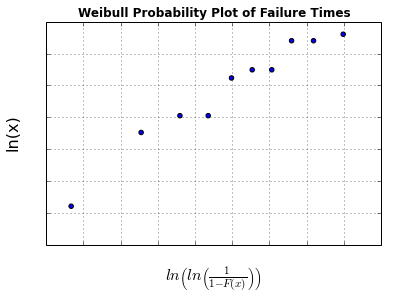

x and y coordinates of the Weibull probability plot:
( -2.66384308539 , 4.44265125649 )
( -1.72326315028 , 4.90527477844 )
( -1.20202311525 , 5.0106352941 )
( -0.821666515129 , 5.0106352941 )
( -0.508595393734 , 5.24702407216 )
( -0.230365444733 , 5.29831736655 )
( 0.0329249619143 , 5.29831736655 )
( 0.299032931862 , 5.48063892334 )
( 0.59397721666 , 5.48063892334 )
( 0.99268892949 , 5.52146091786 )


In [15]:
import numpy as np
from numpy import random
from numpy import log as ln

data = np.array([85,135,150,150,190,200,200,240,240,250])
y = ln(data)
rank = np.arange(1,data.size+1)  # ranks = {1, 2, 3, ... 10}
median_rank = (rank - 0.3)/(rank.size + 0.4)
x = ln(-ln(1 - median_rank))

scatter(x,y)
title("Weibull Probability Plot of Failure Times", weight='bold')
xlabel(r'$ln\left(ln\left(\frac{1}{1-F(x)}\right)\right)$', fontsize=16)
ylabel('ln(x)', fontsize=16)
xticks(color='white')
yticks(color='white')
grid()
show()

print("x and y coordinates of the Weibull probability plot:")
for value in zip(x,y):
    print("( " + str(value[0]) + " , " + str(value[1]) + " )")

#### Also note above, we are plotting the failure times along the y-axis, instead of the x-axis because according to prominent Weibull analysts, we want to do regression analysis on the x direction, instead of the y direction.  This is called "X on Y" median rank regression.

### With least-squares [linear regression](http://austingwalters.com/introduction-to-linear-regression/) method, let's generate a line that will "fit" through the data points as best as possible.  From this "ideal" line, we are going to use the line's slope and y-intercept to calcuate the shape and scale parameter of the ideal Weibull distribution:

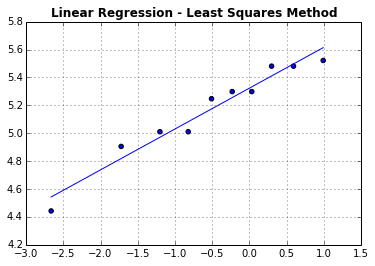

r^2 value: 0.953902860399
slope/shape parameter: 3.41595091809
scale parameter: 204.936017721


In [2]:
import scipy.stats as stats # scipy is a statistical package for Python

# Use Scipy's stats package to perform least-squares fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
scatter(x,y)
plot(x,line)
title("Linear Regression - Least Squares Method", weight='bold')
grid()
show()

# Since we plot failure times on the y-axis, the actual slope is inverted
shape = 1/slope
# Since we plot failure times on the y-axis, we want the x-intercept, not the y-intercept
# x-intercept is equal to the negative y-intercept divided by the slope/shape parameter
# Basically you are solving for x: 0 = mx + b, equation of the line where y = 0
x_intercept = - intercept / shape

print("r^2 value:", r_value**2)
print("slope/shape parameter:", shape)
scale = exp(-x_intercept/slope)
print("scale parameter:", scale)

### From the least-squares fit method above, we now have the Weibull shape and scale parameter.  Next we can plot the actual failure times versus the "ideal" Weibull distribution.  We will plot on a more useful log-log scale where the x axis is the failure time and y axis is the cumulative distribuion function.

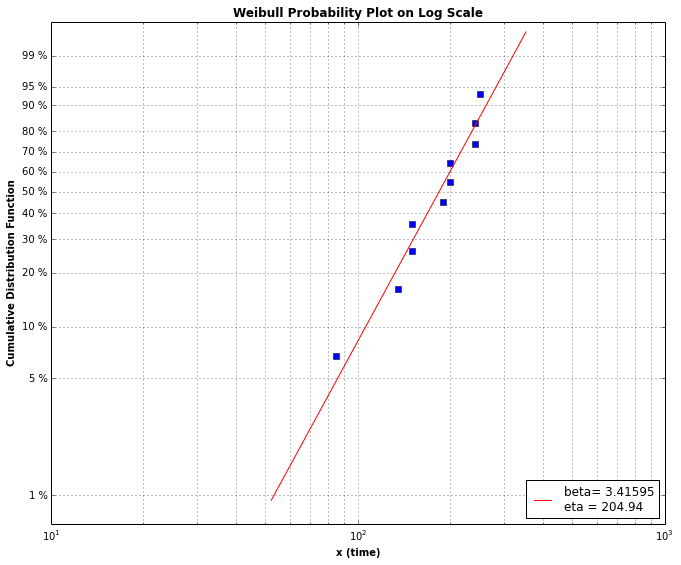

In [3]:
import numpy as np
from numpy import random
from matplotlib.ticker import FuncFormatter

# I'm used to  the ln notation for the natural log
from numpy import log as ln

# Since we are going to plot failure times on log scale, we don't need to take the log of the failure times
x = data
rank = np.arange(1,x.size+1)  # ranks = {1, 2, 3, ... 10}
median_rank = (rank - 0.3)/(rank.size + 0.4)
y = ln(-ln(1 - median_rank))

# Generate 1000 numbers following a Weibull distribution that we think ideally fits our data using the shape and scale parameter
x_ideal = scale *random.weibull(shape, size=100)
x_ideal.sort()
F = 1 - exp( -(x_ideal/scale)**shape )
y_ideal = ln(-ln(1 - F))

# Weibull plot
fig1 = figure()
fig1.set_size_inches(11,9)
ax = subplot(111)
semilogx(x, y, "bs")
plot(x_ideal, y_ideal, 'r-', label="beta= %5G\neta = %.5G" % (shape, scale) )
title("Weibull Probability Plot on Log Scale", weight="bold")
xlabel('x (time)', weight="bold")
ylabel('Cumulative Distribution Function', weight="bold")
legend(loc='lower right')

# Generate ticks
def weibull_CDF(y, pos):
    return "%G %%" % (100*(1-exp(-exp(y))))

formatter = FuncFormatter(weibull_CDF)
ax.yaxis.set_major_formatter(formatter)

yt_F = array([ 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
           0.6, 0.7, 0.8, 0.9, 0.95, 0.99])
yt_lnF = ln( -ln(1-yt_F))
yticks(yt_lnF)
ax.yaxis.grid()
ax.xaxis.grid(which='both')
show()

#### Since it can be difficult to read certain x and y (CDF) values from the Weibull log-log scale plot above, let's create an output containing x values and their corresponding y (CDF) values.

<h4><strong>2-parameter Weibull Cumulative Distribution Function (CDF):</strong></h4><center>$\large{F(x) = 1 - e^{(\frac{x}{\lambda})^k}}$,</center><br>
<center><p>where k is the shape parameter and $\lambda$ is the scale parameter.</p></center>

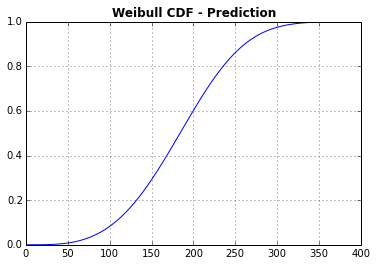

In [4]:
x2 = np.arange(0,400)
y2 = 1-exp(-(x2/scale)**shape) # This is the equation for Weibull CDF as illustrated above

plot(x2,y2)
title("Weibull CDF - Prediction",weight='bold')
grid()
show()

#### Finally,&nbsp;the point of doing all of this is to allow us to predict failures after x units of time.<br><br>Based on the output above, if someone were to ask us "What percent of the population will have failed after 200 days?"  The answer would be approximately 60%.

<a name="part2"></a>
<br>
<br>

## Part 2 - Weibull Analysis with Suspensions/Censored Data

[[back to top](#sections)]

#### In this Part 2 of the series, I will cover how to do Weibull analysis when our data set also includes data from units that didn't fail or failed for a different reason or for a different failure mode.  This scenario where our data set includes data from units that have not failed yet is very common in the industry since most of the time it would be unfeasible or time consuming to wait for all units to have failed. When our data includes data such as these, the data set as a whole is what is referred to as "failure data with suspensions or censored data".  This is just fancy talk by statisticians.<br><br> To perform Weibull analysis on data with suspensions, the "rank" of the data has to be adjusted due to the suspension data.  Then we can accordingly calculate the proper median ranks using Bernard's formula.<br><br> Let's get some failure data that is saved in a csv file:

In [5]:
import pandas

# Open csv file
df = pandas.read_csv('/home/pyb0k3h/Downloads/Weibull_Suspensions.csv')
# Ensure that the data is sorted by DTF in ascending order
df.sort(columns="DTF")
print("What the CSV data looks like:")
print(df)

What the CSV data looks like:
   VIN  DTF     STATUS
0    6   10  SUSPENDED
1    1   30     FAILED
2    7   45  SUSPENDED
3    2   49     FAILED
4    3   82     FAILED
5    4   90     FAILED
6    5   96     FAILED
7    8  100  SUSPENDED


#### From the output above, we see that we have 8 rows of data, where we have 5 failed units and 3 suspensions.<br><br> The equation for calculating the adjusted rank is as follows:<br><br> <center>$\large{Adjusted Rank = \frac{(Reverse Rank)(Previous AdjustedRank)+(N+1)}{(Reverse Rank)+1}}$</center>

#### Now we are ready to create 4 additional columns.  We need: rank, reverse rank, adjusted rank, and median rank.  The Python script below will create those 4 columns for us using the dataframe's apply() method, which allows us to create Excel-like functions to create new columns:

In [6]:
# Reference material on how to use the apply() function in a dataframe:
# http://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe  or
# http://manishamde.github.io/blog/2013/03/07/pandas-and-python-top-10/

# Make sure the data set is sorted by DTF in ascending order
df.sort(columns="DTF")

global prev_adj_rank
prev_adj_rank = [0]

def adj_rank(series):
    if series["STATUS"] == "SUSPENDED":
        return "SUSPENSION"
    else:
        adjusted_rank = (series["REV_RANK"] * 1.0 * prev_adj_rank[-1] + (len(df) + 1))/(series["REV_RANK"] + 1)
        prev_adj_rank.append(adjusted_rank)
        return adjusted_rank
        
def median_rank(series):
    if series["ADJ_RANK"] == "SUSPENSION":
        return NaN
    else:
        median_rank = (series["ADJ_RANK"] - 0.3)/(len(df) + 0.4)
        return median_rank

df["RANK"]=df.index+1
df["REV_RANK"]=len(df)+1-df["RANK"]
df["ADJ_RANK"] = df.apply(adj_rank,axis=1)
df["MEDIAN_RANK"] = df.apply(median_rank, axis=1)
print("What the data looks like with the 4 additional columns(\"NaN\"=Not A Number):")
print(df)

What the data looks like with the 4 additional columns("NaN"=Not A Number):
   VIN  DTF     STATUS  RANK  REV_RANK    ADJ_RANK  MEDIAN_RANK
0    6   10  SUSPENDED     1         8  SUSPENSION          NaN
1    1   30     FAILED     2         7       1.125     0.098214
2    7   45  SUSPENDED     3         6  SUSPENSION          NaN
3    2   49     FAILED     4         5      2.4375     0.254464
4    3   82     FAILED     5         4        3.75     0.410714
5    4   90     FAILED     6         3      5.0625     0.566964
6    5   96     FAILED     7         2       6.375     0.723214
7    8  100  SUSPENDED     8         1  SUSPENSION          NaN


#### Since we will actually only plot data from failed units and not the suspensions, we want to limit our data set to those 5 rows where status equals "FAILED":

In [7]:
print("What the data looks like with just failed data:")
df_final = df[df.STATUS == "FAILED"]
print(df_final)

What the data looks like with just failed data:
   VIN  DTF  STATUS  RANK  REV_RANK ADJ_RANK  MEDIAN_RANK
1    1   30  FAILED     2         7    1.125     0.098214
3    2   49  FAILED     4         5   2.4375     0.254464
4    3   82  FAILED     5         4     3.75     0.410714
5    4   90  FAILED     6         3   5.0625     0.566964
6    5   96  FAILED     7         2    6.375     0.723214


#### Now we can start creating the usual probability plots:

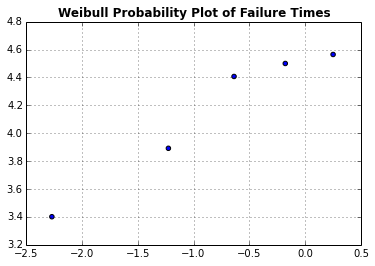

x and y coordinates of the Weibull plot:
( -2.26935967679 , 3.40119738166 )
( -1.22535907083 , 3.89182029811 )
( -0.637061542208 , 4.40671924726 )
( -0.178008782168 , 4.49980967033 )
( 0.25037862029 , 4.56434819147 )


In [8]:
import numpy as np
from numpy import random
from numpy import log as ln

data = df_final["DTF"].values
y = ln(data)
median_rank = df_final["MEDIAN_RANK"].values
x = ln(-ln(1 - median_rank))

scatter(x,y)
title("Weibull Probability Plot of Failure Times", weight='bold')
grid()
show()

print("x and y coordinates of the Weibull plot:")
for value in zip(x,y):
    print("( " + str(value[0]) + " , " + str(value[1]) + " )")

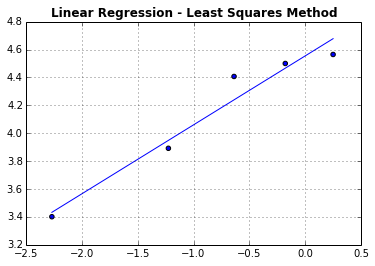

r^2 value: 0.953148083657
slope/shape parameter: 2.02425855437
scale parameter: 94.9979428891


In [9]:
import scipy.stats as stats # scipy is a statistical package for Python

# Use Scipy's stats package to perform least-squares fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
scatter(x,y)
plot(x,line)
title("Linear Regression - Least Squares Method", weight='bold')
grid()
show()

# Since we plot failure times on the y-axis, the actual slope is inverted
shape = 1/slope
# Since we plot failure times on the y-axis, we want the x-intercept, not the y-intercept
# x-intercept is equal to the negative y-intercept divided by the slope/shape parameter
# Basically you are solving for x: 0 = mx + b, equation of the line where y = 0
x_intercept = - intercept / shape

print("r^2 value:", r_value**2)
print("slope/shape parameter:", shape)
scale = exp(-x_intercept/slope)
print("scale parameter:", scale)

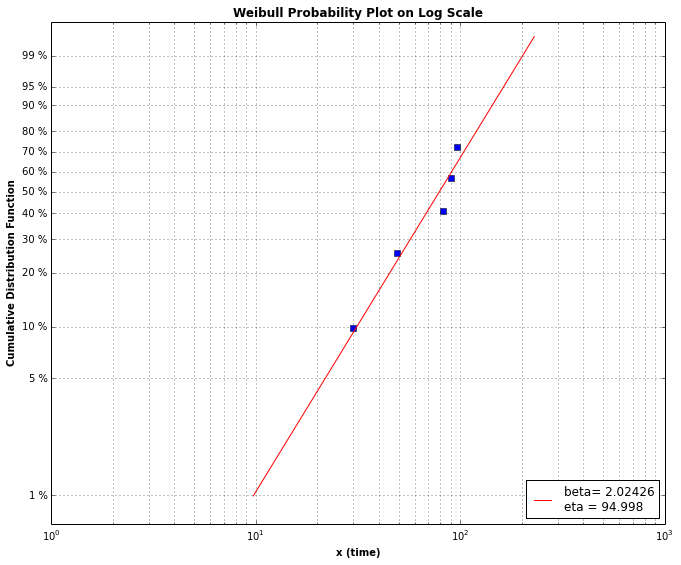

In [11]:
import numpy as np
from numpy import random
from matplotlib.ticker import FuncFormatter

# I'm used to  the ln notation for the natural log
from numpy import log as ln

# 10 failures that we are assuming follow a Weibull distribution
x = df_final["DTF"].values
rank = np.arange(1,data.size+1)  # ranks = {1, 2, 3, ... 21}
median_rank = df_final["MEDIAN_RANK"].values
y = ln(-ln(1 - median_rank))

# Generate 1000 numbers following a Weibull distribution that we think ideally fits our data using the shape and scale parameter
x_ideal = scale *random.weibull(shape, size=100)
x_ideal.sort()
F = 1 - exp( -(x_ideal/scale)**shape )
y_ideal = ln(-ln(1 - F))

# Weibull plot
fig1 = figure()
fig1.set_size_inches(11,9)
ax = subplot(111)
semilogx(x, y, "bs")
plot(x_ideal, y_ideal, 'r-', label="beta= %5G\neta = %.5G" % (shape, scale) )
title("Weibull Probability Plot on Log Scale", weight="bold")
xlabel('x (time)', weight="bold")
ylabel('Cumulative Distribution Function', weight="bold")
legend(loc='lower right')

# Generate ticks
def weibull_CDF(y, pos):
    return "%G %%" % (100*(1-exp(-exp(y))))

formatter = FuncFormatter(weibull_CDF)
ax.yaxis.set_major_formatter(formatter)

yt_F = array([ 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
           0.6, 0.7, 0.8, 0.9, 0.95, 0.99])
yt_lnF = ln( -ln(1-yt_F))
yticks(yt_lnF)
ax.yaxis.grid()
ax.xaxis.grid(which='both')
show()

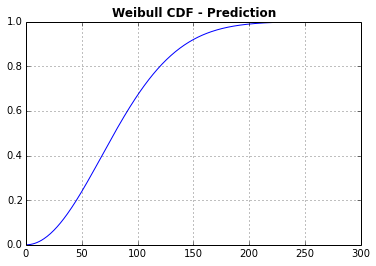

In [12]:
x2 = np.arange(0,300)
y2 = 1-exp(-(x2/scale)**shape) # This is the equation for Weibull CDF

plot(x2,y2)
title("Weibull CDF - Prediction",weight='bold')
grid()
show()

### Now, we're done!

#### Actually, there's more to this. &nbsp;There are considerations that need to be made in determining if our line through the data points is a "good" fit. &nbsp;Also, when dealing with suspensions as outlined in this part 2, I have found that if I have very large quantities of suspensions compared to actual failures, X on Y median rank regression method did not work very well.  &nbsp;After brief <a href="http://www.weibull.com/hotwire/issue16/relbasics16.htm">research</a>, I have found that in this case, it is recommended that I use a non-graphical method called maximum likelihood estimation (MLE).  &nbsp;When I have time, I will look into estimating Weibull paramenters using MLE method.  &nbsp;I guess that will be my Part 3.

<a name="MLE"></a>
<br>
<br>

### Part 3 - Estimating Weibull parameters using Maximum Likelihood Estimation (MLE)

[[back to top](#sections)]

#### To solve for our scale parameter (k) using MLE, we need to solve for this equation below:

<center>$\huge{\sum\limits_{i=1}^r \frac{ln(x_i)}{r}=\frac{\sum\limits_{i=1}^n (x_i)^kln(x_i)}{\sum\limits_{i=1}^n (x_i)^k}-\frac{1}{k}\approx0}$</center> ,<br><br>
<center>Where $x_i$ is the ith failure time,</center><br>
<center>r is the number of failures,</center><br>
<center>and n is the total number of failure times, both failed and suspended</center>

#### The equation above basically means we need to find a value of k such that the left of the equation equals the right equation or in other words, the value of k such that the difference between the left of the equation and right of the equation is as close to zero as possible.  Once we find the value of k, the scale parameter can be calculated as:

<center>$\large{\lambda=\left(\sum\limits_{i=1}^n \frac{(x_i)^k}{r}\right)^\frac{1}{k}}$</center>

#### Let's get data from a csv file and calculate the left side of the equation $\left(\large{\sum\limits_{i=1}^r \frac{ln(x_i)}{r}}\right)$:

In [2]:
import pandas
from numpy import log as ln

# Open csv file
df = pandas.read_csv('/home/pybokeh/Desktop/data.csv')

df_failed = df[df.STATUS=='FAILED']

dtf_failed = df_failed["DTF"].values

def ln_x_div_r(series):
    return ln(series["DTF"])/len(df_failed)

left_eq_sum = np.sum( ln(dtf_failed)/len(df_failed) )

df_failed["ln_x_div_r"] = df_failed.apply(ln_x_div_r, axis=1)

print(df_failed.to_string(),"\n")
print("Sum of \"ln_x_div_r\" column =", left_eq_sum)

      DTF  STATUS  ln_x_div_r
1    77.8  FAILED    0.395831
4   101.8  FAILED    0.420274
5   105.9  FAILED    0.423863
6   117.0  FAILED    0.432925
7   126.9  FAILED    0.440309
8   138.7  FAILED    0.448392
9   148.9  FAILED    0.454843
11  157.3  FAILED    0.459832
12  163.8  FAILED    0.463513
16  207.0  FAILED    0.484793
18  217.4  FAILED    0.489249 

Sum of "ln_x_div_r" column = 4.91382428308


<center>left side = $\large{\sum\limits_{i=1}^r \frac{ln(x_i)}{r}=4.9138}$</center>

#### The left side of the equation was calculated to be 4.9138.  Next we are going to calculate the right side of the equation using 100,000 values of k ranging from 0.1 to 10 and then substract the result from 4.9138.  Basically, what we are trying to achieve is throw a lot of k values into the right side of the equation, and subtract the result from it from 4.9138 until we find the difference as small or close to zero as possible. 

<center>$\large{4.9138-\left(\frac{\sum\limits_{i=1}^n (x_i)^kln(x_i)}{\sum\limits_{i=1}^n (x_i)^k}-\frac{1}{k}\right) \approx 0}$</center>

### This script below will calculate the 100,000 values that represent the difference of the left side and right side of the equation:

In [3]:
dtf_all = df["DTF"].values

# Generate 10,0000 k values that is between 0.1 and 10
# Can't use 0 because it is not a valid value in the right-side equation formula, so we're using 0.1 instead
k = np.linspace(0.1,5,100000,endpoint=True)

right = []
for value in k:
    right_eq = np.sum( dtf_all**value * ln(dtf_all) ) / np.sum( dtf_all**value ) - (1/value)
    right.append(right_eq)
    
right_values = np.array(right)

diff = right_values - left_eq_sum

#### When it is done, at this point we should have 100,000 difference values and their corresponding k values.  Now let's plot them and see what they look like:

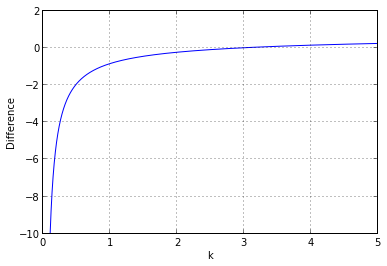

In [4]:
plot(k,diff)
ylabel("Difference")
xlabel("k")
grid()
show()

#### As I've already mentioned, we need to choose a k value where the difference between the left equation and right equation is close to 0 as possible.  From the plot above, it looks like it would be approximately 3.  But instead of trying to "eye-ball it", let's calculate a more precise value for k where the difference is as close to zero as possible:

In [5]:
ks = np.array(k)
diffs = np.array(diff)

d = {'k' : ks,
     'diff' : diffs}
    
df_k_diff = pandas.DataFrame(d, index=np.arange(1,ks.size+1)) # Create one-based index instead of zero-based
df_k_diff = df_k_diff.sort_index(axis=1, ascending=False)  # Re-sorting the columns so that k column in on the left

print("What the k values and their diffs look like:")
print(df_k_diff.head())
print(df_k_diff.tail(), "\n")

print("The row with the first smallest difference:")
k_with_smallest_diff = df_k_diff[ (df_k_diff["diff"] >= 0.000001)][0:1]
print(k_with_smallest_diff, "\n")

final_k = k_with_smallest_diff["k"].values
k_final = final_k[0]
print("Therefore, the k value we should use where the difference is as close to zero is:", k_final)

What the k values and their diffs look like:
          k      diff
1  0.100000 -9.977133
2  0.100049 -9.972226
3  0.100098 -9.967325
4  0.100147 -9.962428
5  0.100196 -9.957536
               k      diff
99996   4.999804  0.234991
99997   4.999853  0.234995
99998   4.999902  0.234999
99999   4.999951  0.235003
100000  5.000000  0.235006 

The row with the first smallest difference:
              k      diff
58663  2.974467  0.000004 

Therefore, the k value we should use where the difference is as close to zero is: 2.97446674467


#### OK so now that we solved for k, we can solve for the scale ($\lambda$) parameter next:

<center>$\large{\lambda=\left(\sum\limits_{i=1}^n \frac{(x_i)^k}{r}\right)^\frac{1}{k}}$</center>

In [6]:
l = (np.sum((dtf_all**k_final)/len(df_failed)))**(1/k_final)
print("scale parameter:",l)

scale parameter: 203.294704504


#### Let's revisit the difference vs k value plot again:

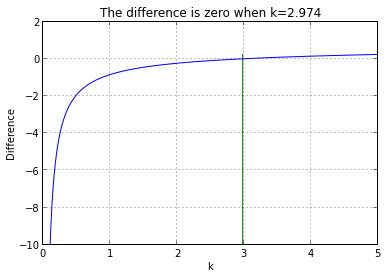

In [7]:
x = []
for value in range(0,100000):
    x.append(k_final)

plot(k,diff)
plot(x,diff)
title("The difference is zero when k=2.974")
ylabel("Difference")
xlabel("k")
grid()
show()

#### We're done!  So using MLE method, we calculated the shape parameter to be 2.974 and the scale parameter to be 203.94.  With the usual Weibull CDF plot below, we are equipped to make failure predictions.

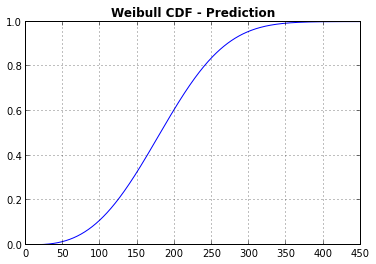

In [8]:
shape = 2.974
scale = 203.94

x2 = np.arange(0,450)
y2 = 1-exp(-(x2/scale)**shape) # This is the equation for Weibull CDF

plot(x2,y2)
title("Weibull CDF - Prediction",weight='bold')
grid()
show()

### AMMENDMENT:

#### After some research, I found out that the method that I used to calculate the shape parameter is very inefficient since it is basically brute force method.  It turns out that, I can use Newton-Raphson method which will find the shape parameter MUCH faster.

<center><h3>Newton-Raphson Method:</h3></center><br>
<center>$\huge{X_{n+1}=X_n+\frac{f(x)}{f'(x)}}$</center><br>
<center>where $X_n$ is an arbitrary initial value,</center><br>
<center>f(x) in our case is equal to our MLE equation above:</center><br>
<center>$\large{f(x)=\sum\limits_{i=1}^r \frac{ln(x_i)}{r}+\frac{1}{k}-\frac{\sum\limits_{i=1}^n (x_i)^kln(x_i)}{\sum\limits_{i=1}^n (x_i)^k}}$</center><br>
Due to the tediousness of the equation for f(x), some arbitrary variables (A,B,C,H) were used to simplify the Newton-Raphson equation:<br>
<center>$\huge{k_{n+1}=k_n+\frac{A+\frac{1}{k_n}-\frac{C_n}{B_n}}{\frac{1}{k_n^2}+\frac{(B_nH_n-C_n^2)}{B_n^2}}}$</center><br><br>
<center>where</center><br><center>$A=\sum\limits_{i=1}^r \frac{ln(x_i)}{r}$ &nbsp;,&nbsp;&nbsp;&nbsp;&nbsp; $B=\sum\limits_{i=1}^n x_i^{k_n}$&nbsp;,&nbsp;&nbsp; $C=\sum\limits_{i=1}^n (x_i)^{k_n}\space ln(x_i)$</center><br>
<center>and</center><br>
<center>$H=\sum\limits_{i=1}^n x_i^{k_n}(lnx_i)^2$</center><br><br>
<h3>But what do we use for the initial k value($k_n$)?</h3><br>
It has been suggested to use the following:<br>
<center>$k_n=\left[\frac{\frac{6}{\pi^2}\left[\sum\limits_{i=1}^n (lnx_i)^2-\left(\sum\limits_{i=1}^n lnx_i\right)^2/n\right]}{n-1} \right]^{-\frac{1}{2}}$</center><br>
Supposedly using this equation, we will get the shape parameter on average after 3.5 iterations to achieve 4-place accuracy.

#### Below is the translation of those equations above into Python equivalent code and interating Newton-Raphson method 10 times:

In [19]:
# give initial value for the shape paramter:
shape = (( (6.0/np.pi**2)*(np.sum(ln(dtf_all)**2) - ((np.sum(ln(dtf_all)))**2)/dtf_all.size) ) / (dtf_all.size-1))**-0.5
for i in range(1,11):
    A = np.sum(ln(dtf_failed) * 1.0)/dtf_failed.size
    B = np.sum(dtf_all**shape)
    C = np.sum( (dtf_all**shape) * ln(dtf_all) )
    H = np.sum( (dtf_all**shape) * (ln(dtf_all))**2 )
    shape = shape + (A+(1.0/shape) - (C/B)) / ( (1.0/shape**2) + ( (B*H)-C**2 ) / B**2 )
    print("shape"+str(i)+" "+str(shape))

shape1 2.97304267161
shape2 2.97444125054
shape3 2.97444177838
shape4 2.97444177838
shape5 2.97444177838
shape6 2.97444177838
shape7 2.97444177838
shape8 2.97444177838
shape9 2.97444177838
shape10 2.97444177838


In [20]:
print("So it looks like the Newton-Raphson method calculated the shape value to be:")
print(shape)
print("after only 3 iterations")

So it looks like the Newton-Raphson method calculated the shape value to be:
2.97444177838
after only 3 iterations


#### This is very close to the shape parameter value obtained earlier using the inefficient iterative method.

This IPython notebook Weibull analysis was made possible based on reference material from the <a href="http://www.weibull.nl/index.php/about-reliability/weibull-statistics">weibull.nl</a> website and also from <a href="http://www.qualitydigest.com/jan99/html/body_weibull.html">this</a> example of doing Weibull analysis using Excel.

[[back to top](#sections)]